In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [8]:
import kagglehub
dataset_path = kagglehub.dataset_download('yasserhessein/gender-dataset')


In [9]:
dataset = os.path.join(dataset_path, 'Dataset')
data = os.path.join(dataset, 'Train')

In [10]:
sections = ['Male', 'Female']
img_size = 50

def load_images_and_labels(dataset_path, sections, img_size):
    data = []
    labels = []
    for label, section in enumerate(sections):
        folder_path = os.path.join(dataset_path, section)
        images = os.listdir(folder_path)
        for img_file in images:
          img_path = os.path.join(folder_path, img_file)
          img = cv2.imread(img_path)
          img = cv2.resize(img, (img_size, img_size))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
          data.append(img.flatten())  # Flatten the image
          labels.append(label)
    return np.array(data), np.array(labels)

images, labels = load_images_and_labels(data, sections, img_size)
images = images / 255.0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels, random_state=42)

In [12]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [13]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy * 100:.3f}%")
print(f"Test Accuracy: {test_accuracy * 100:.3f}%")

Training Accuracy: 91.626%
Test Accuracy: 91.156%


**Classification report**

In [14]:
print(classification_report(y_test, model.predict(X_test), target_names=sections))

              precision    recall  f1-score   support

        Male       0.90      0.89      0.89      6716
      Female       0.92      0.92      0.92      9284

    accuracy                           0.91     16000
   macro avg       0.91      0.91      0.91     16000
weighted avg       0.91      0.91      0.91     16000



**Haar Cascade for Detection**

In [15]:
haarcascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haarcascade_path)

In [16]:
def detect_and_predict_gender(image_path, model):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]  # Crop the face
        face_resized = cv2.resize(face, (img_size, img_size)).flatten() / 255.0  # Resize and normalize
        face_resized = np.expand_dims(face_resized, axis=0)

        prediction = model.predict(face_resized)
        gender = sections[prediction[0]]
        # Draw box with gender
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, gender, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return img

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error processing /content/drive/My Drive/Input Images/0.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



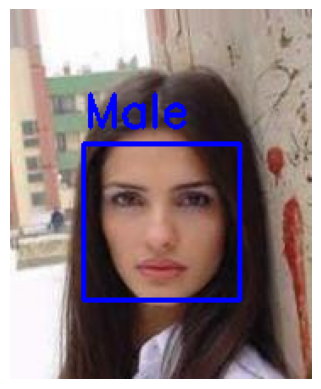

Processed and saved: /content/drive/MyDrive/Output Images/annotated_1.jpg


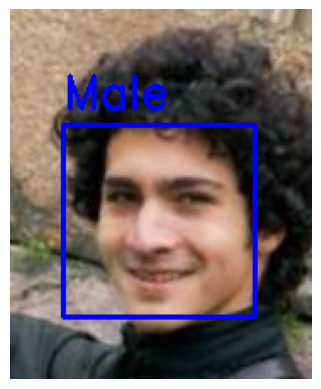

Processed and saved: /content/drive/MyDrive/Output Images/annotated_2.jpg


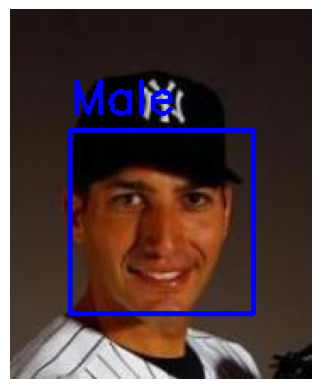

Processed and saved: /content/drive/MyDrive/Output Images/annotated_3.jpg


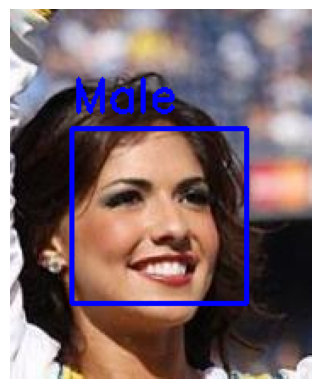

Processed and saved: /content/drive/MyDrive/Output Images/annotated_4.jpg
Error processing /content/drive/My Drive/Input Images/5.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



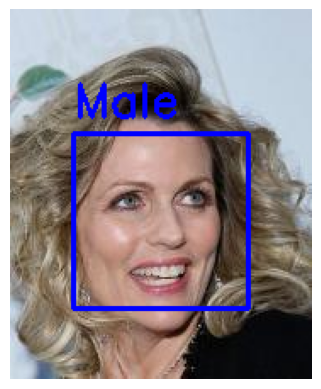

Processed and saved: /content/drive/MyDrive/Output Images/annotated_6.jpg


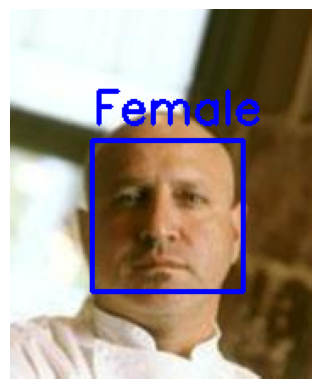

Processed and saved: /content/drive/MyDrive/Output Images/annotated_7.jpg


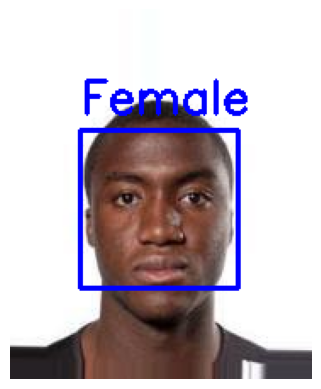

Processed and saved: /content/drive/MyDrive/Output Images/annotated_8.jpg


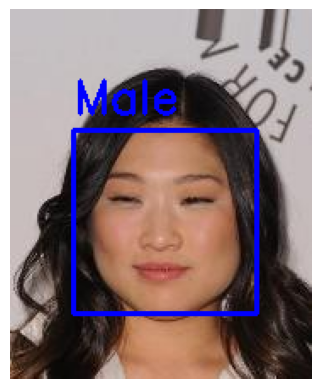

Processed and saved: /content/drive/MyDrive/Output Images/annotated_9.jpg
Error processing /content/drive/My Drive/Input Images/10.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



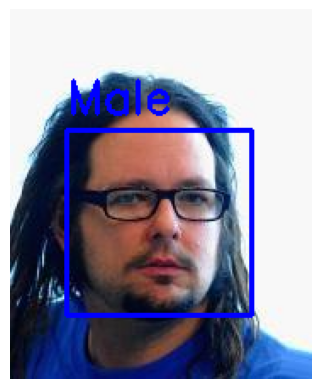

Processed and saved: /content/drive/MyDrive/Output Images/annotated_11.jpg


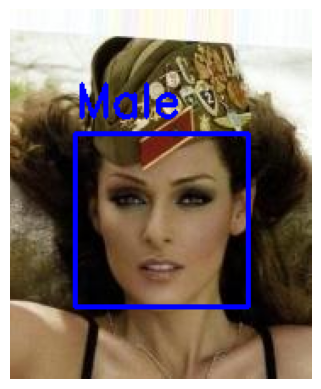

Processed and saved: /content/drive/MyDrive/Output Images/annotated_12.jpg
Error processing /content/drive/My Drive/Input Images/13.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



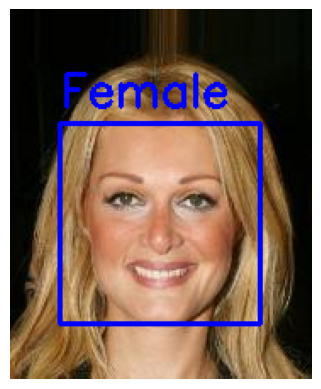

Processed and saved: /content/drive/MyDrive/Output Images/annotated_14.jpg


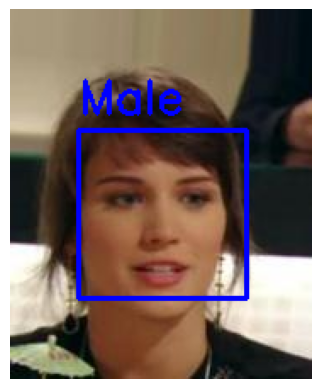

Processed and saved: /content/drive/MyDrive/Output Images/annotated_15.jpg


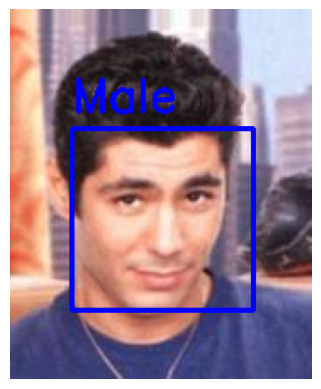

Processed and saved: /content/drive/MyDrive/Output Images/annotated_16.jpg


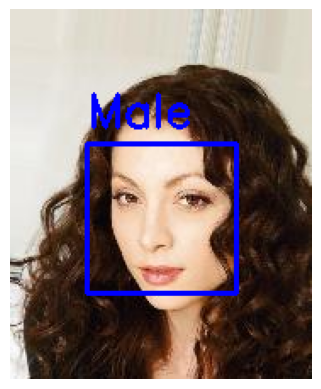

Processed and saved: /content/drive/MyDrive/Output Images/annotated_17.jpg


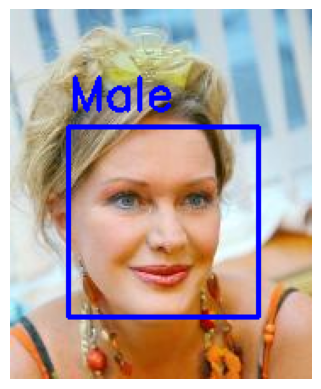

Processed and saved: /content/drive/MyDrive/Output Images/annotated_18.jpg


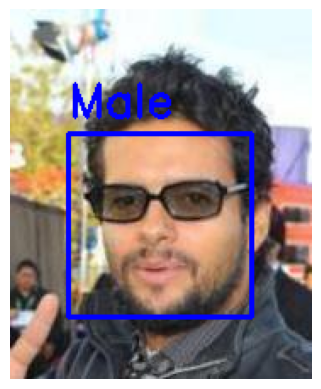

Processed and saved: /content/drive/MyDrive/Output Images/annotated_19.jpg
Error processing /content/drive/My Drive/Input Images/20.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [21]:
# Test with an Image
from google.colab import drive
drive.mount('/content/drive')

for i in range(21):
    image_path = f'/content/drive/My Drive/Input Images/{i}.jpg'
    try:
        output_image = detect_and_predict_gender(image_path, model)
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        output_path = f'/content/drive/MyDrive/Output Images/annotated_{i}.jpg'
        cv2.imwrite(output_path, output_image)
        print(f"Processed and saved: {output_path}")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")